# Custom training: walkthrough
* [source site](https://www.tensorflow.org/beta/tutorials/eager/custom_training_walkthrough)

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager execution: True


### Download the dataset

In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /home/hyunsu/.keras/datasets/iris_training.csv


In [4]:
train_dataset_fp

'/home/hyunsu/.keras/datasets/iris_training.csv'

In [5]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


Total samples: 120, features: 4, three lable
first four field are feature(flower measurements)
last column is the label, 0,1,2 = flower name

In [6]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [9]:
column_names[:-1]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [10]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica'] # 0: setosa, 1: versicolor, 2: virginica

### From CSV to tf.dataset

In [53]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [54]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=575, shape=(32,), dtype=float32, numpy=
array([7.2, 4.9, 6.4, 5.4, 6.9, 5.1, 5.8, 7. , 4.5, 5.8, 7.7, 4.8, 6.6,
       6.4, 4.8, 7.2, 5.5, 5.4, 6.5, 6.4, 6.6, 4.6, 5.1, 6.7, 6. , 6.9,
       6. , 6.1, 7.7, 7.7, 5.7, 5.4], dtype=float32)>), ('sepal_width', <tf.Tensor: id=576, shape=(32,), dtype=float32, numpy=
array([3. , 3.1, 2.8, 3.9, 3.1, 2.5, 2.7, 3.2, 2.3, 4. , 3. , 3. , 3. ,
       3.1, 3.1, 3.2, 2.6, 3.7, 3. , 2.8, 2.9, 3.2, 3.7, 3. , 2.9, 3.2,
       2.7, 2.8, 3.8, 2.6, 3.8, 3.9], dtype=float32)>), ('petal_length', <tf.Tensor: id=573, shape=(32,), dtype=float32, numpy=
array([5.8, 1.5, 5.6, 1.7, 5.1, 3. , 4.1, 4.7, 1.3, 1.2, 6.1, 1.4, 4.4,
       5.5, 1.6, 6. , 4.4, 1.5, 5.5, 5.6, 4.6, 1.4, 1.5, 5. , 4.5, 5.7,
       5.1, 4. , 6.7, 6.9, 1.7, 1.3], dtype=float32)>), ('petal_width', <tf.Tensor: id=574, shape=(32,), dtype=float32, numpy=
array([1.6, 0.1, 2.2, 0.4, 2.3, 1.1, 1. , 1.4, 0.3, 0.2, 2.3, 0.3, 1.4,
       1.8, 0.2, 1.8, 1.2, 0.

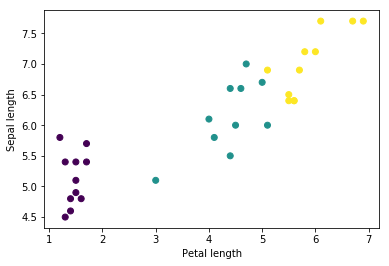

In [61]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [62]:
def pack_features_vector(features, labels):
    """Pack the features into a single array."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [63]:
train_dataset = train_dataset.map(pack_features_vector)

In [64]:
features, labels = next(iter(train_dataset))

print(features[:5]) # shape (batch_size, num_features)

tf.Tensor(
[[7.2 3.  5.8 1.6]
 [4.9 3.1 1.5 0.1]
 [6.4 2.8 5.6 2.2]
 [5.4 3.9 1.7 0.4]
 [6.9 3.1 5.1 2.3]], shape=(5, 4), dtype=float32)


In [65]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [66]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=881, shape=(5, 3), dtype=float32, numpy=
array([[-1.101285  , -0.12239817, -2.7781425 ],
       [ 0.06765151, -0.37413728, -1.056047  ],
       [-1.2565874 ,  0.07320377, -2.636272  ],
       [ 0.02974704, -0.46526545, -1.1250175 ],
       [-1.1271892 ,  0.00754592, -2.5532417 ]], dtype=float32)>

In [67]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=887, shape=(5, 3), dtype=float32, numpy=
array([[0.2598447 , 0.6915746 , 0.04858072],
       [0.5081402 , 0.32667592, 0.16518383],
       [0.19873162, 0.751256  , 0.05001239],
       [0.51956284, 0.31670642, 0.16373073],
       [0.2298531 , 0.71492344, 0.05522346]], dtype=float32)>

In [68]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels)) # before training

Prediction: [1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0]
    Labels: [2 0 2 0 2 1 1 1 0 0 2 0 1 2 0 2 1 0 2 2 1 0 0 1 1 2 1 1 2 2 0 0]


In [69]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
def loss(model, x, y):
    y_ = model(x)

    return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.4470024108886719


In [70]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables) # autograd for trainable_variables of model

In [71]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [72]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables)) # applying the result of autograd to optimizer.

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.4470024108886719
Step: 1,         Loss: 1.1298000812530518


In [73]:
## Note: Rerunning this cell uses the same model variables

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
    for x, y in train_dataset:
    # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
        epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
        epoch_accuracy(y, model(x))

  # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.998, Accuracy: 35.833%
Epoch 050: Loss: 0.061, Accuracy: 99.167%
Epoch 100: Loss: 0.049, Accuracy: 99.167%
Epoch 150: Loss: 0.045, Accuracy: 99.167%
Epoch 200: Loss: 0.042, Accuracy: 99.167%


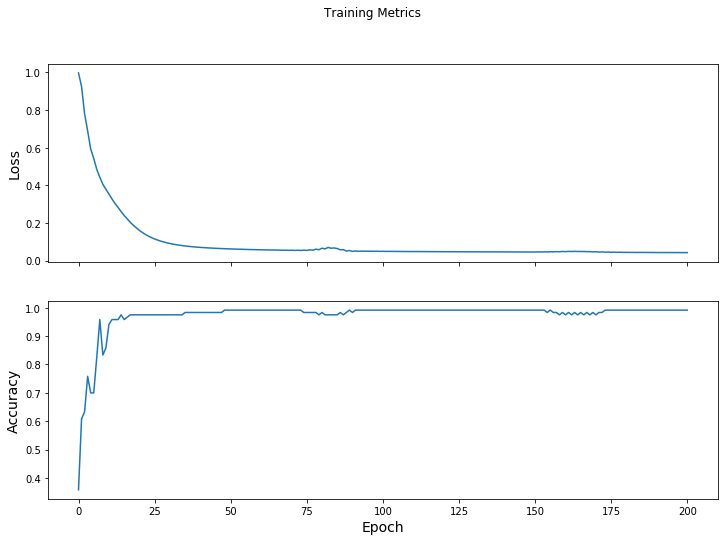

In [74]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [75]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [77]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [78]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=160481, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [79]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (99.9%)
Example 1 prediction: Iris versicolor (99.9%)
Example 2 prediction: Iris virginica (99.8%)


In [80]:
predictions

<tf.Tensor: id=160497, shape=(3, 3), dtype=float32, numpy=
array([[ 14.023458 ,   7.51372  , -19.086239 ],
       [ -6.765255 ,   4.1377378,  -3.2944696],
       [-18.183647 ,  -0.7789272,   5.4218454]], dtype=float32)>